In lecture we did tutorial 14 based on two methods jax and autograd. Jupyter notebook corresponding to
these methods are available on Moodle. We solved equation dy/dx = −2xy; y(0) = 1 using these two methods with
the help of NN.

##Q1.

In [ ]:
import jax.numpy as np

###a) Run the problem for 1, 8, 1 neurons in the input, hidden and output later (as default), but for 10 grid points in the input vector x and 100 grid points. Compare the solutions of y in the range −2 ≤ x ≤ 2.

In [ ]:
# Define sigmoid function. It will be used in the neural network.

def sigmoid(x):
    return 1./(1. + np.exp(-x))

# Define a function for the neural net
def f(params, x):
    w0 = params[:8]
    b0 = params[8:16]
    w1 = params[16:24]
    b1 = params[24]
    x = sigmoid(x*w0 + b0)
    x = sigmoid(np.sum(x*w1) + b1)
    return x

In [ ]:
# Determine derivative of f with respect to x
from jax import grad
dfdx = grad(f,1)

In [ ]:
# vectorize functions using vmap
from jax import vmap
f_vect = vmap(f, (None, 0))
dfdx_vect = vmap(dfdx, (None, 0))

In [ ]:
# Define loss function
from jax import jit

@jit
def loss(params, inputs):
    eq = dfdx_vect(params, inputs) + 2.*inputs*f_vect(params, inputs)
    ic = f(params, 0.) - 1.
    # make it coveex so that the gradient can be determined efficiently.
    return np.mean(eq**2) + np.mean(ic**2)

In [ ]:
#differentiate the loss function with respect to the trainable parameters
grad_loss = jit(grad(loss, 0))

####10 Grid Points

In [ ]:
# Initialize the parameters randomly
from jax import random
#pseudo-random number generator (PRNG) provided by JAX
key = random.PRNGKey(0)
params = random.normal(key, shape=(25,))

In [ ]:
# Create desired arrays of inputs
inputs_1 = np.linspace(-2., 2., num=10)

In [ ]:
# Run the model
epochs = 1000
learning_rate = 0.1
momentum = 0.99
velocity = 0.
# nesterov momentum
for epoch in range(epochs):
    if epoch % 100 == 0:
        print('epoch: %3d loss: %.6f' % (epoch, loss(params, inputs_1)))
    gradient = grad_loss(params + momentum*velocity, inputs_1)
    velocity = momentum*velocity - learning_rate*gradient
    params += velocity

epoch:   0 loss: 0.927512
epoch: 100 loss: 0.071349
epoch: 200 loss: 0.026995
epoch: 300 loss: 0.020401
epoch: 400 loss: 0.016150
epoch: 500 loss: 0.001688
epoch: 600 loss: 0.000903
epoch: 700 loss: 0.000188
epoch: 800 loss: 0.000197
epoch: 900 loss: 0.000107


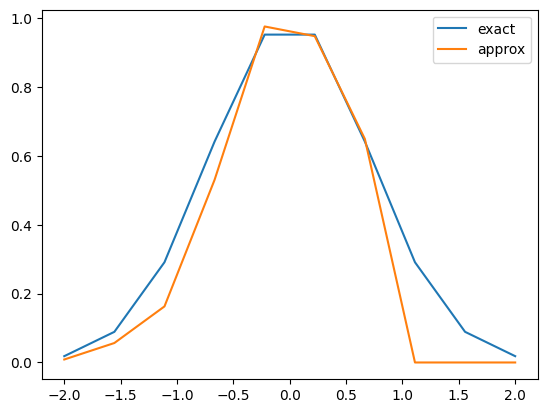

In [ ]:
import matplotlib.pyplot as plt #plot
plt.plot(inputs_1, np.exp(-inputs_1**2), label='exact')
plt.plot(inputs_1, f_vect(params, inputs_1), label='approx')
plt.legend()
plt.show()

####100 Grid Points

In [ ]:
params = random.normal(key, shape=(25,))
inputs_2 = np.linspace(-2., 2., num=100)
epochs = 1000
learning_rate = 0.1
momentum = 0.99
velocity = 0.
for epoch in range(epochs):
    if epoch % 100 == 0:
        print('epoch: %3d loss: %.6f' % (epoch, loss(params, inputs_2)))
    gradient = grad_loss(params + momentum*velocity, inputs_2)
    velocity = momentum*velocity - learning_rate*gradient
    params += velocity

epoch:   0 loss: 0.917519
epoch: 100 loss: 0.025976
epoch: 200 loss: 0.021717
epoch: 300 loss: 0.010057
epoch: 400 loss: 0.004874
epoch: 500 loss: 0.003398
epoch: 600 loss: 0.002555
epoch: 700 loss: 0.002052
epoch: 800 loss: 0.001760
epoch: 900 loss: 0.001620


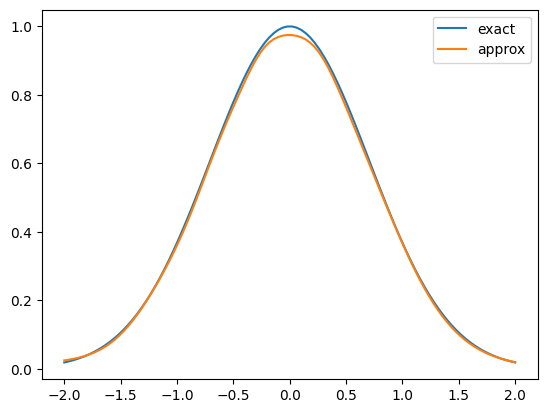

In [ ]:
plt.plot(inputs_2, np.exp(-inputs_2**2), label='exact')
plt.plot(inputs_2, f_vect(params, inputs_2), label='approx')
plt.legend()
plt.show()

####Analysis

There is a much closer match between the exact solution and NN approximate for 100 grid points as compared to 10 grid points</br>
More grid points essentially mean more data points for the NN to train and represent the solution more accurately

###b) Keeping the grid points fixed to 100, run the network for 5 neurons in the hidden layer vs. 20 nuerons. Compare the solution of y in the range −2 ≤ x ≤ 2.

####5 Neurons

In [ ]:
def f(params, x):
    w0 = params[:5]
    b0 = params[5:10]
    w1 = params[10:15]
    b1 = params[15]
    x = sigmoid(x*w0 + b0)
    x = sigmoid(np.sum(x*w1) + b1)
    return x
dfdx = grad(f,1)
f_vect = vmap(f, (None, 0))
dfdx_vect = vmap(dfdx, (None, 0))
@jit
def loss(params, inputs):
    eq = dfdx_vect(params, inputs) + 2.*inputs*f_vect(params, inputs)
    ic = f(params, 0.) - 1.
    return np.mean(eq**2) + np.mean(ic**2)
grad_loss = jit(grad(loss, 0))

In [ ]:
params = random.normal(key, shape=(16,))
epochs = 1000
learning_rate = 0.1
momentum = 0.99
velocity = 0.
for epoch in range(epochs):
    if epoch % 100 == 0:
        print('epoch: %3d loss: %.6f' % (epoch, loss(params, inputs_2)))
    gradient = grad_loss(params + momentum*velocity, inputs_2)
    velocity = momentum*velocity - learning_rate*gradient
    params += velocity

epoch:   0 loss: 1.136698
epoch: 100 loss: 0.242463
epoch: 200 loss: 0.049875
epoch: 300 loss: 0.025895
epoch: 400 loss: 0.014967
epoch: 500 loss: 0.011520
epoch: 600 loss: 0.009908
epoch: 700 loss: 0.008769
epoch: 800 loss: 0.008229
epoch: 900 loss: 0.007889


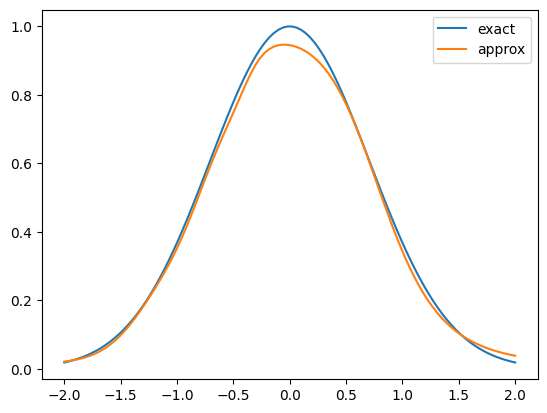

In [ ]:
plt.plot(inputs_2, np.exp(-inputs_2**2), label='exact')
plt.plot(inputs_2, f_vect(params, inputs_2), label='approx')
plt.legend()
plt.show()

####20 Neurons

In [ ]:
def f(params, x):
    w0 = params[:20]
    b0 = params[20:40]
    w1 = params[40:60]
    b1 = params[60]
    x = sigmoid(x*w0 + b0)
    x = sigmoid(np.sum(x*w1) + b1)
    return x
dfdx = grad(f,1)
f_vect = vmap(f, (None, 0))
dfdx_vect = vmap(dfdx, (None, 0))
@jit
def loss(params, inputs):
    eq = dfdx_vect(params, inputs) + 2.*inputs*f_vect(params, inputs)
    ic = f(params, 0.) - 1.
    return np.mean(eq**2) + np.mean(ic**2)
grad_loss = jit(grad(loss, 0))

In [ ]:
params = random.normal(key, shape=(61,))
epochs = 1000
learning_rate = 0.1
momentum = 0.99
velocity = 0.
for epoch in range(epochs):
    if epoch % 100 == 0:
        print('epoch: %3d loss: %.6f' % (epoch, loss(params, inputs_2)))
    gradient = grad_loss(params + momentum*velocity, inputs_2)
    velocity = momentum*velocity - learning_rate*gradient
    params += velocity

epoch:   0 loss: 3.973676
epoch: 100 loss: nan
epoch: 200 loss: nan
epoch: 300 loss: nan
epoch: 400 loss: nan
epoch: 500 loss: nan
epoch: 600 loss: nan
epoch: 700 loss: nan
epoch: 800 loss: nan
epoch: 900 loss: nan


Loss is infinite (exploding gradient) --> disable momentum

In [ ]:
params = random.normal(key, shape=(61,))
epochs = 1000
learning_rate = 1
momentum = 0
velocity = 0
for epoch in range(epochs):
    if epoch % 100 == 0:
        print('epoch: %3d loss: %.6f' % (epoch, loss(params, inputs_2)))
    gradient = grad_loss(params + momentum*velocity, inputs_2)
    velocity = momentum*velocity - learning_rate*gradient
    params += velocity

epoch:   0 loss: 3.973676
epoch: 100 loss: 0.049642
epoch: 200 loss: 0.041085
epoch: 300 loss: 0.035439
epoch: 400 loss: 0.029720
epoch: 500 loss: 0.024851
epoch: 600 loss: 0.021054
epoch: 700 loss: 0.018277
epoch: 800 loss: 0.016290
epoch: 900 loss: 0.014883


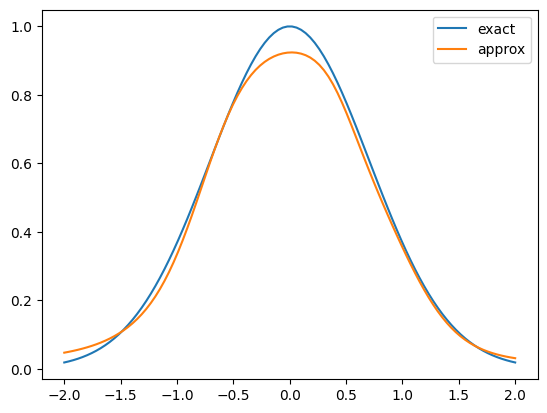

In [ ]:
plt.plot(inputs_2, np.exp(-inputs_2**2), label='exact')
plt.plot(inputs_2, f_vect(params, inputs_2), label='approx')
plt.legend()
plt.show()

####Analysis

It seems higher number of neurons is adding unnecessary complexity leading to convergence issues

In [ ]:
params = random.normal(key, shape=(61,))
epochs = 1000
learning_rate = 1
momentum = 0.1
velocity = 0.9
for epoch in range(epochs):
    if epoch % 100 == 0:
        print('epoch: %3d loss: %.6f' % (epoch, loss(params, inputs_2)))
    gradient = grad_loss(params + momentum*velocity, inputs_2)
    velocity = momentum*velocity - learning_rate*gradient
    params += velocity

epoch:   0 loss: 3.973676
epoch: 100 loss: 0.043005
epoch: 200 loss: 0.037009
epoch: 300 loss: 0.030270
epoch: 400 loss: 0.025121
epoch: 500 loss: 0.021005
epoch: 600 loss: 0.017923
epoch: 700 loss: 0.015661
epoch: 800 loss: 0.013991
epoch: 900 loss: 0.012717


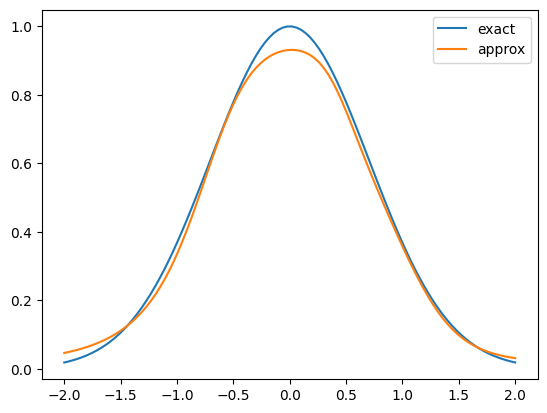

In [ ]:
plt.plot(inputs_2, np.exp(-inputs_2**2), label='exact')
plt.plot(inputs_2, f_vect(params, inputs_2), label='approx')
plt.legend()
plt.show()

###c) For 1, 8, 1 neuron setup, and 100 grid points. Run the model for range −2 ≤ x ≤ 2 and then for range −20 ≤ x ≤ 20. Compare the solutions of y in the range −2 ≤ x ≤ 2.

In [ ]:
def f(params, x):
    w0 = params[:8]
    b0 = params[8:16]
    w1 = params[16:24]
    b1 = params[24]
    x = sigmoid(x*w0 + b0)
    x = sigmoid(np.sum(x*w1) + b1)
    return x
dfdx = grad(f,1)
f_vect = vmap(f, (None, 0))
dfdx_vect = vmap(dfdx, (None, 0))
@jit
def loss(params, inputs):
    eq = dfdx_vect(params, inputs) + 2.*inputs*f_vect(params, inputs)
    ic = f(params, 0.) - 1.
    return np.mean(eq**2) + np.mean(ic**2)
grad_loss = jit(grad(loss, 0))

In [ ]:
params = random.normal(key, shape=(25,))
epochs = 1000
learning_rate = 0.1
momentum = 0.99
velocity = 0.
for epoch in range(epochs):
    if epoch % 100 == 0:
        print('epoch: %3d loss: %.6f' % (epoch, loss(params, inputs_2)))
    gradient = grad_loss(params + momentum*velocity, inputs_2)
    velocity = momentum*velocity - learning_rate*gradient
    params += velocity

epoch:   0 loss: 0.917519
epoch: 100 loss: 0.025976
epoch: 200 loss: 0.021717
epoch: 300 loss: 0.010057
epoch: 400 loss: 0.004874
epoch: 500 loss: 0.003398
epoch: 600 loss: 0.002555
epoch: 700 loss: 0.002052
epoch: 800 loss: 0.001760
epoch: 900 loss: 0.001620


In [ ]:
params_2 = random.normal(key, shape=(25,))
inputs_3 = np.linspace(-20., 20., num=100)
epochs = 1000
learning_rate = 1
momentum = 0.1
velocity = 0.9
for epoch in range(epochs):
    if epoch % 100 == 0:
        print('epoch: %3d loss: %.6f' % (epoch, loss(params_2, inputs_3)))
    gradient = grad_loss(params_2 + momentum*velocity, inputs_3)
    velocity = momentum*velocity - learning_rate*gradient
    params_2 += velocity

epoch:   0 loss: 2.993222
epoch: 100 loss: 1.000000
epoch: 200 loss: 1.000000
epoch: 300 loss: 1.000000
epoch: 400 loss: 1.000000
epoch: 500 loss: 1.000000
epoch: 600 loss: 1.000000
epoch: 700 loss: 1.000000
epoch: 800 loss: 1.000000
epoch: 900 loss: 1.000000


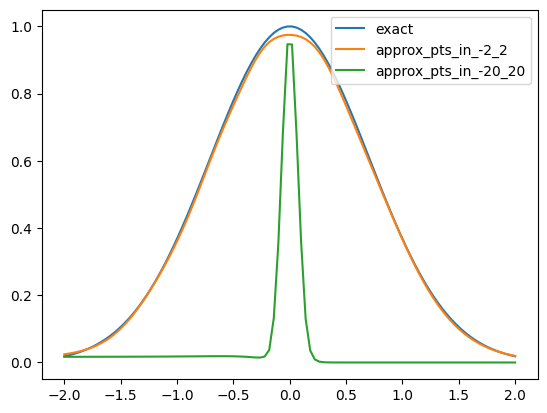

In [ ]:
plt.plot(inputs_2, np.exp(-inputs_2**2), label='exact')
plt.plot(inputs_2, f_vect(params, inputs_2), label='approx_pts_in_-2_2')
plt.plot(inputs_2, f_vect(params, inputs_3), label='approx_pts_in_-20_20')
plt.legend()
plt.show()

####Analysis

Sampling 100 points within -20 to 20 resulted in too less data points as examples for training in the region under consideration (-2 to 2), hence hasn't captured the function well in -2 to 2 as compared to sampling 100 points within -2 to 2.

##Q2.

Solve the equation dy/dx = 2x3 − exp(−x); y(0) = 1 using autograd Jupyter notebook file. You may have to
use larger number of grid points and neurons in the center layer.

In [1]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
from autograd.misc.optimizers import adam
import time

In [2]:
def sigmoid_activation(x):
    return x / (1.0 + np.exp(-x))

In [3]:
def init_random_params(layer_sizes):
    rs=npr.RandomState(0)
#Define a list of (weights, biases tuples, one for each layer."
    return [(rs.randn(insize, outsize),   # weight matrix
             rs.randn(outsize))           # bias vector
            for insize, outsize in zip(layer_sizes[:-1], layer_sizes[1:])]

In [4]:
# Define function y based on neural networks. Outputs are linearly related to biases and weights.
# Outputs of one layer are used as inputs to another layer via activation function.
def y(params, inputs):
    "Neural network functions"
    for W, b in params:
        outputs = np.dot(inputs, W) + b
        inputs = sigmoid_activation(outputs)    
    return outputs

In [5]:
# Make an initial guess of params:
params = init_random_params(layer_sizes=[1, 20, 1]) # 20 neurons in hidden layer

In [6]:
dydx = elementwise_grad(y, 1) # this is the partial derivative of y with respect to inputs i.e. x

In [7]:
y0 = 1.0
x = np.linspace(-2, 2, 1000).reshape((-1, 1)) # 1000 grid points

In [8]:
# Define the objective function.
def lossfunction(params,step):
    # The objective is to minimize to zero.
    zeq = dydx(params, x) - 2*(x**3) + np.exp(-x)
    y0 = 1.0
    ic = y(params, 0) - y0
    return np.mean(zeq**2 + ic**2)

In [9]:
def callback(params, step, g):
    if step % 100 == 0:
        print("Iteration {0:3d} lossfunction {1}".format(step,lossfunction(params,step)))

In [10]:
#ODE solver
params = adam(grad(lossfunction), params, callback=callback, step_size=0.1, num_iters=1000) 

Iteration   0 lossfunction 99.06238525759856
Iteration 100 lossfunction 0.1750243240042168
Iteration 200 lossfunction 0.04809976295629481
Iteration 300 lossfunction 0.023269650870733044
Iteration 400 lossfunction 0.011849684146099871
Iteration 500 lossfunction 0.0075504415652033405
Iteration 600 lossfunction 0.00552886688143051
Iteration 700 lossfunction 0.004216646672206143
Iteration 800 lossfunction 0.0032772784324018424
Iteration 900 lossfunction 0.0025924372537584183


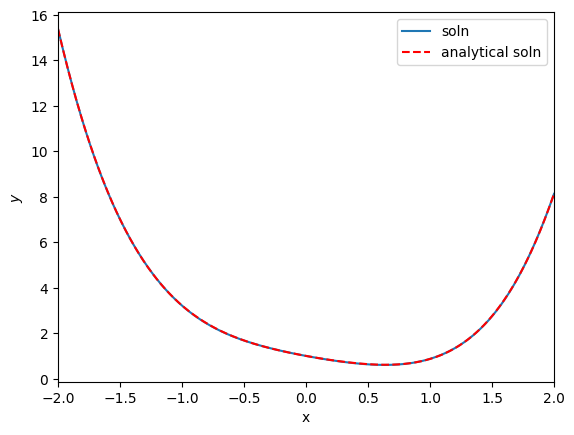

In [11]:
#Plot
tfit = np.linspace(-2, 2, 1000).reshape(-1, 1)
import matplotlib.pyplot as plt
plt.plot(tfit, y(params, tfit), label='soln') 
plt.plot(tfit,(((tfit**4)/2)+np.exp(-tfit)), 'r--', label='analytical soln')
plt.legend()
plt.xlabel('x')
plt.ylabel('$y$')
plt.xlim([-2, 2])
plt.savefig('odenn.png')

The ODE solution obtained via autograd matches with the analytical solution